In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape
from descartes import PolygonPatch
import numpy as np
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
path="/home/alguero/Work/smodelsv2-paper/IDM-Scoto/scalar_DM_scenario/plots"
df = pd.read_csv("scalarData.csv")
fer = pd.read_csv("scalarDataFermions.csv")
simple = pd.read_csv("simplescanData.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df=df.sort_values(by='rmax', ascending=True)
df[(df['mHc'] < 200) & (df['dHc'] > 10)]

,mA0,mHc,mH0,deltaM,dHc,dataType,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
27090,200.8100,159.9880,159.8484,0.1396,10.591593,efficiencyMap,7.293092,ATLAS-SUSY-2016-32,7.216585,CMS-EXO-13-006,0.0,7.293092,"THSCPM11, THSCPM1b, THSCPM8",THSCPM1b,True,idm-batch9-pt-2887.slha
16196,202.3636,195.0982,194.9585,0.1397,10.010039,efficiencyMap,7.402052,CMS-EXO-13-006,7.223023,ATLAS-SUSY-2016-32,0.0,7.402052,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b,True,idm-batch9-pt-3117.slha
13274,200.7178,165.5897,165.4501,0.1396,10.286416,efficiencyMap,7.719572,ATLAS-SUSY-2016-32,6.369957,CMS-EXO-13-006,0.0,7.719572,"THSCPM11, THSCPM1b, THSCPM8",THSCPM1b,True,idm-batch9-pt-2925.slha
15237,252.8126,191.9326,191.7930,0.1396,10.757205,efficiencyMap,7.773368,CMS-EXO-13-006,7.718673,ATLAS-SUSY-2016-32,0.0,7.773368,"THSCPM1b, THSCPM2b, THSCPM8, THSCPM9",THSCPM2b,True,idm-batch9-pt-2604.slha
18586,191.0826,167.9100,167.7704,0.1396,10.162791,efficiencyMap,7.901369,ATLAS-SUSY-2016-32,6.172591,CMS-EXO-13-006,0.0,7.901369,"THSCPM11, THSCPM1b, THSCPM8",THSCPM1b,True,idm-batch9-pt-3492.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,182.7784,179.8040,179.7440,0.0600,1747.248351,efficiencyMap,85.874400,ATLAS-SUSY-2016-32,37.731280,CMS-EXO-13-006,0.0,85.874400,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3411.slha
19059,177.3467,173.1297,173.0513,0.0784,459.153336,efficiencyMap,87.611960,ATLAS-SUSY-2016-32,33.448310,CMS-EXO-13-006,0.0,87.611960,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3147.slha
8070,176.4480,173.6519,173.5733,0.0786,455.120679,efficiencyMap,88.075270,ATLAS-SUSY-2016-32,36.555200,CMS-EXO-13-006,0.0,88.075270,THSCPM1b,THSCPM1b,False,idm-batch2-pt-4518.slha
6463,177.2137,173.7134,173.6534,0.0600,1747.276200,efficiencyMap,88.880680,ATLAS-SUSY-2016-32,38.851620,CMS-EXO-13-006,0.0,88.880680,THSCPM1b,THSCPM1b,False,idm-batch2-pt-1838.slha


In [2]:
excl = df[df['rmax'] > 1]
compressed = excl[excl['mA0']-excl['mHc']<5]
# df = df[df['mA0']-df['mHc']>5]
fer = fer[fer['mA0']-fer['mHc']>5]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = df[df['rmaxDT']>1]
atlas = dt[dt.ana.str.contains('ATLAS')]
dtf = fer[fer['rmaxDT']>1]
cms = dtf[dtf.ana.str.contains('CMS')]
atlasf = fer[((fer.ana.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax'] > 1)) | ((fer.ana2.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax2'] > 1))]
hscp = df[df['rmaxHSCP']>1]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
compressed[compressed['dHc'] > 2]

,mA0,mHc,mH0,deltaM,dHc,dataType,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
25581,387.2919,387.0282,386.8889,0.1393,6.469278,efficiencyMap,1.014207,CMS-EXO-13-006,0.241827,CMS-PAS-EXO-16-036,0.0,1.014207,"THSCPM1b, THSCPM2b",THSCPM2b,False,idm-batch9-pt-548.slha
27284,248.3498,247.3195,247.1797,0.1398,3.879421,efficiencyMap,1.017501,CMS-EXO-13-006,0.297498,ATLAS-SUSY-2016-32,0.0,1.017501,"THSCPM1b, THSCPM2b",THSCPM2b,True,idm-batch7-pt-575.slha
8226,494.3528,494.0850,493.9662,0.1188,57.302035,efficiencyMap,1.020847,CMS-EXO-13-006,0.986998,ATLAS-SUSY-2016-32,0.0,1.020847,"THSCPM1b, THSCPM2b",THSCPM2b,False,idm-batch1-pt-4726.slha
10164,525.7537,522.8516,522.7122,0.1394,24.946494,upperLimit,1.023793,ATLAS-SUSY-2016-32,0.992517,CMS-EXO-13-006,0.0,1.023793,THSCPM1b,THSCPM1b,False,idm-batch10-pt-220.slha
5171,534.7061,533.6405,533.5547,0.0858,290.720109,upperLimit,1.032399,ATLAS-SUSY-2016-32,0.849658,ATLAS-SUSY-2016-32,0.0,1.032399,THSCPM1b,THSCPM1b,False,idm-batch3-pt-1582.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,182.7784,179.8040,179.7440,0.0600,1747.248351,efficiencyMap,85.874400,ATLAS-SUSY-2016-32,37.731280,CMS-EXO-13-006,0.0,85.874400,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3411.slha
19059,177.3467,173.1297,173.0513,0.0784,459.153336,efficiencyMap,87.611960,ATLAS-SUSY-2016-32,33.448310,CMS-EXO-13-006,0.0,87.611960,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3147.slha
8070,176.4480,173.6519,173.5733,0.0786,455.120679,efficiencyMap,88.075270,ATLAS-SUSY-2016-32,36.555200,CMS-EXO-13-006,0.0,88.075270,THSCPM1b,THSCPM1b,False,idm-batch2-pt-4518.slha
6463,177.2137,173.7134,173.6534,0.0600,1747.276200,efficiencyMap,88.880680,ATLAS-SUSY-2016-32,38.851620,CMS-EXO-13-006,0.0,88.880680,THSCPM1b,THSCPM1b,False,idm-batch2-pt-1838.slha


In [3]:
tot = df.shape[0]
for ana in analyses:
    part = df[df['ana'] == ana].shape[0]
    percent = part/tot
    print(ana, percent*100)

ATLAS-SUSY-2016-32 28.548939082819984
CMS-EXO-13-006 37.05681040383299
ATLAS-SUSY-2016-06 34.394250513347025


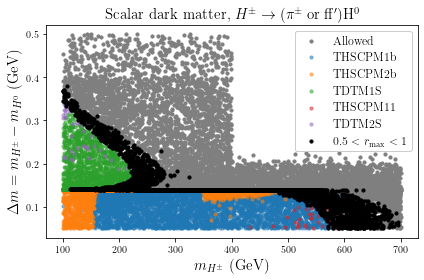

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed", s=10)
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label, s=10, alpha=0.5)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0$",fontsize = 15)
plt.ylabel(r'$\Delta m = m_{H^\pm} - m_{H^0}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

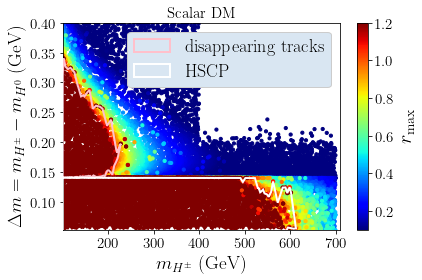

In [5]:
fig, ax = plt.subplots()
plt.scatter(df['mHc'],df['deltaM'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
plt.scatter(compressed['mHc'],compressed['deltaM'],c=compressed['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', size = 20)
cb.ax.tick_params(labelsize=15) 

###Disappearing tracks
frame_analysis2d=dt[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='pink',fill=False,zorder=20,lw=2,label='disappearing tracks'))

####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','deltaM']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=3,label='DT fermions excl.'))

        
####HSCP
frame_analysis2d=hscp[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP'))

lgd = plt.legend(loc='upper right', facecolor='#d9e6f2', framealpha = 1., fontsize = 18), 

# plt.text(200, 0.1, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
# plt.annotate(xy=(150, 0.2), xytext=(405, 0.35), s="disappearing tracks\nexclusion", color='black', fontsize=15, 
#              arrowprops={'arrowstyle':'->'}, ha='left', va='center')

ax.set_ylim(0.053,0.4)
ax.set_xlim(101,710)
# plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\Delta m = m_{H^\pm} - m_{H^0}$ (GeV)',fontsize = 19)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplots_adjust(bottom=.13)
plt.subplots_adjust(left=.13)
plt.title('Scalar DM', fontsize = 15)
file = os.path.join(path, "scalarDeltaM.png")
plt.tight_layout()
plt.savefig(file)
plt.show()

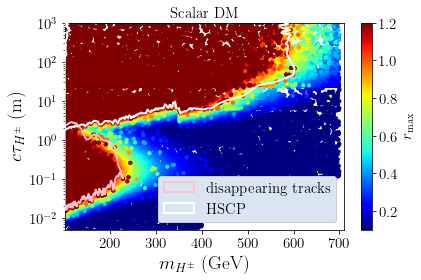

In [6]:
fig, ax = plt.subplots()
plt.scatter(df['mHc'],df['dHc'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
plt.scatter(compressed['mHc'],compressed['dHc'],c=compressed['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', size = 15)
cb.ax.tick_params(labelsize=15) 

####Disappearing tracks
frame_analysis2d=dt[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='pink',fill=False,zorder=20,lw=2,label='disappearing tracks'))

####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','dHc']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=3,label='dis. tracks fermions eff.'))
        
####HSCP
frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
# Function for varying the alpha parameter
def alf(ind, r):
    if any(frame_analysis2d[ind][:,0] < 200) and any(frame_analysis2d[ind][:,1] < 7):
        return .05
#     elif any(frame_analysis2d[ind][:,0] < 280) and any(frame_analysis2d[ind][:,1] < 10):
#         return .0002
    elif any(frame_analysis2d[ind][:,0] < 380) and any(frame_analysis2d[ind][:,1] < 10):
        return .3
    else:
        return .008                
                
alpha_shape = alphashape.alphashape(frame_analysis2d, alf)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP'))

lgd = plt.legend(loc='lower right', facecolor='#d9e6f2', framealpha = 1., fontsize = 15)

# plt.text(175, 100, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
# plt.annotate(xy=(150, 0.1), xytext=(300, 0.7), s="disappearing tracks\nexclusion", color='white', fontsize=15, 
#              arrowprops={'arrowstyle':'->', 'color':'white'}, ha='left', va='center')

ax.set_ylim(5e-3,1e3)
ax.set_xlim(101,710)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 25)
plt.ylabel(r'$c\tau_{H^\pm}$ (m)',fontsize = 19)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 19)
plt.title('Scalar DM', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.subplots_adjust(bottom=.13)
plt.subplots_adjust(left=.13)
file = os.path.join(path, "scalarWidth.png")
plt.tight_layout()
plt.savefig(file)
plt.show()

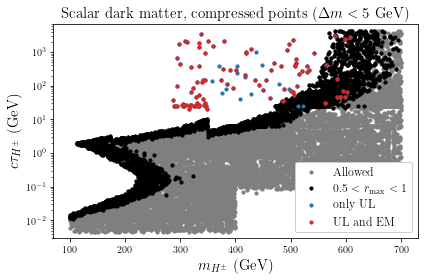

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed", s=10)
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)
# for ana in analyses:
# ana = "ATLAS-SUSY-2016-32"
# toplot = df[((df['ana']==ana)&(df['rmax']>1)) | ((df['ana2']==ana)&(df['rmax2']>1))]
# label = ana
# plt.scatter(toplot['mHc'], toplot['dHc'], label=label, alpha=0.5, s=10)
ul = compressed[(compressed['dataType'] == 'upperLimit')]
plt.scatter(ul['mHc'], ul['dHc'], label='only UL', s=10, color='tab:blue')
ulem = compressed[(compressed['dataType'] == 'upperLimit') & (compressed['ana2'] == "ATLAS-SUSY-2016-32")]
plt.scatter(ulem['mHc'], ulem['dHc'], label='UL and EM', s=10, color='tab:red')
# toplot = compressed[(compressed['dataType'] == 'efficiencyMap') & (compressed['ana'] == "ATLAS-SUSY-2016-32")]
# plt.scatter(toplot['mHc'], toplot['dHc'], label='EM', s=10, color='tab:green')



lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.title(r"Scalar dark matter, compressed points ($\Delta m < 5$ GeV)",fontsize = 15)
plt.ylabel(r'$c\tau_{H^\pm}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

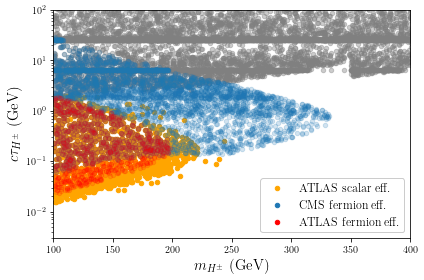

---slhas excluded by atlas scalar EM for which mHc > 225 GeV---


,mA0,mHc,mH0,deltaM,dHc,dataType,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
5868,240.1071,236.7626,236.5578,0.2048,0.086534,efficiencyMap,1.144542,ATLAS-SUSY-2016-06,1.056402e-06,ATLAS-SUSY-2016-32,1.144542,1.056402e-06,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-127.slha
20178,245.7376,243.4247,243.2632,0.1615,0.256665,efficiencyMap,1.146755,ATLAS-SUSY-2016-06,5.634553e-07,ATLAS-SUSY-2016-32,1.146755,5.634553e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-4551.slha
12747,244.1159,239.4557,239.2632,0.1925,0.110744,efficiencyMap,1.200531,ATLAS-SUSY-2016-06,8.375941e-07,ATLAS-SUSY-2016-32,1.200531,8.375941e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-2698.slha
16540,231.1759,227.7184,227.5213,0.1971,0.100479,efficiencyMap,1.359489,ATLAS-SUSY-2016-06,2.042295e-06,ATLAS-SUSY-2016-32,1.359489,2.042295e-06,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-203.slha


In [8]:
plt.figure(figsize=(6,4))
plt.scatter(hscp['mHc'], hscp['dHc'], s=20, color='grey', alpha=0.4)
plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS scalar eff.", s=20, color='orange')
plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS fermion eff.", s=20, alpha = 0.2, color='C0')
plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS fermion eff.", s=20, color='red', alpha=0.15)


lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)
for lh in lgd.legendHandles: 
    lh.set_alpha(1)

plt.ylim(3E-3,1E2)
plt.xlim(100,400)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$c\tau_{H^\pm}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparison.png")
plt.savefig(file)
plt.show()
print("---slhas excluded by atlas scalar EM for which mHc > 225 GeV---")
atlas[atlas['mHc']>225]

In [9]:
aldClose = ald[ald['mHc']>225]
aldClose = aldClose[aldClose['mHc']<245]
aldClose = aldClose[aldClose['dHc']>0.09]
aldClose = aldClose[aldClose['dHc']<0.11]
aldClose

,mA0,mHc,mH0,deltaM,dHc,dataType,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
21642,305.7141,244.3789,244.1773,0.2016,0.091854,efficiencyMap,0.659252,ATLAS-SUSY-2016-06,7.223142e-07,CMS-SUS-16-033,0.659252,2.770903e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-256.slha
18000,282.8115,243.7038,243.5021,0.2017,0.091638,efficiencyMap,0.664373,ATLAS-SUSY-2016-06,2.978830e-07,ATLAS-SUSY-2016-07,0.664373,2.697672e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-3777.slha
11643,255.4045,240.7634,240.5685,0.1949,0.105033,efficiencyMap,0.713665,ATLAS-SUSY-2016-06,3.326533e-07,ATLAS-SUSY-2016-32,0.713665,3.326533e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-1401.slha
5634,317.4736,239.8329,239.6363,0.1966,0.101398,efficiencyMap,0.716266,ATLAS-SUSY-2016-06,7.157641e-07,CMS-SUS-16-033,0.716266,3.719357e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-554.slha
4355,241.2762,234.5502,234.3536,0.1966,0.101527,efficiencyMap,0.768291,ATLAS-SUSY-2016-06,5.959620e-07,ATLAS-SUSY-2016-32,0.768291,5.959620e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-2006.slha
20296,265.5192,233.7803,233.5870,0.1933,0.108722,efficiencyMap,0.789375,ATLAS-SUSY-2016-06,6.349889e-07,ATLAS-SUSY-2016-32,0.789375,6.349889e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-2981.slha
27304,278.5262,232.1188,231.9214,0.1974,0.099933,efficiencyMap,0.790353,ATLAS-SUSY-2016-06,7.164341e-07,ATLAS-SUSY-2016-32,0.790353,7.164341e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-2249.slha
27732,265.3197,229.9161,229.7152,0.2009,0.093199,efficiencyMap,0.799904,ATLAS-SUSY-2016-06,8.285078e-07,ATLAS-SUSY-2016-32,0.799904,8.285078e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-1718.slha
4267,294.3242,226.9207,226.7217,0.1990,0.096880,efficiencyMap,0.841510,ATLAS-SUSY-2016-06,9.978397e-07,ATLAS-SUSY-2016-32,0.841510,9.978397e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch1-pt-1749.slha
11806,247.4382,226.7134,226.5145,0.1989,0.096947,efficiencyMap,0.844073,ATLAS-SUSY-2016-06,1.008922e-06,ATLAS-SUSY-2016-32,0.844073,1.008922e-06,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-208.slha


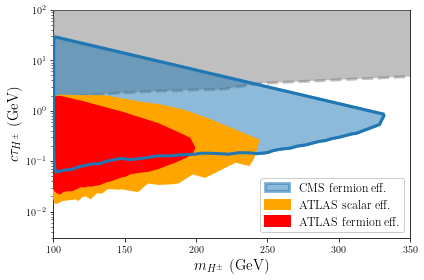

In [10]:
plt.figure(figsize=(6,4))
# plt.scatter(hscp['mHc'], hscp['dHc'],s=20, color='grey', alpha=0.2)
ax = plt.gca()
# plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS-SUSY-2016-06 scalar eff.", s=20, color='orange')
# plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS-EXO-19-010 fermions eff.", s=20, alpha = 0.2, color='C0')
# plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS-SUSY-2016-06 fermion eff.", s=20, color='red', alpha=0.15)

frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaHscp = alphashape.alphashape(frame_analysis2d, .0005)

frame_analysis2d=atlas[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaAtlas = alphashape.alphashape(frame_analysis2d, .0005)

frame_analysis2d=atlasf[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaFatlas = alphashape.alphashape(frame_analysis2d, .0005)

frame_analysis2d=cms[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaCms = alphashape.alphashape(frame_analysis2d, .0005)

ax.add_patch(PolygonPatch(alphaHscp, alpha=.5,ec='grey',fc='grey',ls='--',fill=True,zorder=20,lw=3))
ax.add_patch(PolygonPatch(alphaCms, alpha=.5,ec='C0',fc='C0',fill=True,zorder=20,lw=3,label='CMS fermion eff.'))
ax.add_patch(PolygonPatch(alphaAtlas, alpha=1,ec='orange',fc='orange',fill=True,zorder=20,lw=3,label='ATLAS scalar eff.'))
ax.add_patch(PolygonPatch(alphaFatlas, alpha=1,ec='red',fc='red',fill=True,zorder=20,lw=3,label='ATLAS fermion eff.'))
ax.add_patch(PolygonPatch(alphaCms, alpha=1,ec='C0',fc='C0',fill=False,zorder=20,lw=3))

lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)
# for lh in lgd.legendHandles: 
#     lh.set_alpha(1)

plt.ylim(3E-3,1E2)
plt.xlim(100,350)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$c\tau_{H^\pm}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparisonContour.png")
plt.savefig(file)
plt.show()

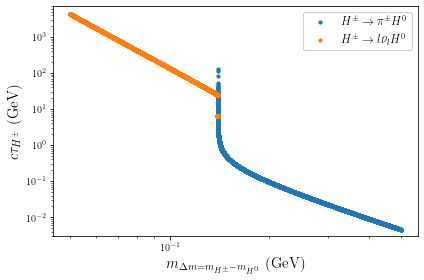

In [11]:
plt.figure(figsize=(6,4))
pions = df[df['pions']]
nopions = df[~df['pions']]
plt.scatter(pions['deltaM'], pions['dHc'], label=r"$H^\pm \to \pi^\pm H^0$", s=10)
plt.scatter(nopions['deltaM'], nopions['dHc'], label=r"$H^\pm \to l\bar{\nu}_l H^0$", s=10)



lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$c\tau_{H^\pm}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "hpWidth.png")
plt.savefig(file)
plt.show()

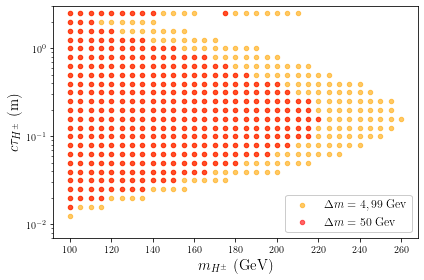

N dm005 508
N dm050 346
N dm100 345


In [12]:
simple = simple[simple['rmax'] > 1]
dm005 = simple[simple['mA0']-simple['mHc'] < 5]
dm050 = simple[simple['mA0']-simple['mHc'] == 50]
dm100 = simple[simple['mA0']-simple['mHc'] == 100]

plt.scatter(dm005['mHc'], dm005['dHc'], label=r"$\Delta m = 4,99$ Gev", s=20, alpha = .6, color='orange')
plt.scatter(dm050['mHc'], dm050['dHc'], label=r"$\Delta m = 50$ Gev", s=20, alpha = .6, color='red')
# plt.scatter(dm100['mHc'], dm100['dHc'], label=r"$\Delta m = 100$ Gev", s=20, alpha = 1, color='C0')
lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)

plt.ylim(0.007,3)
# plt.xlim(90,260)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$c\tau_{H^\pm}$ (m)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "compressionComparison.png")
plt.savefig(file)
plt.show()
print('N dm005', len(dm005))
print('N dm050', len(dm050))
print('N dm100', len(dm100))

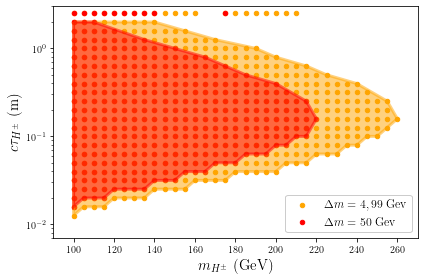

N dm005 487
N dm050 336
N dm100 345


In [13]:
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.scatter(dm005['mHc'], dm005['dHc'], label=r"$\Delta m = 4,99$ Gev", s=20, alpha = 1, color='orange')
plt.scatter(dm050['mHc'], dm050['dHc'], label=r"$\Delta m = 50$ Gev", s=20, alpha = 1, color='red')
simple = simple[simple['dHc'] < 2.1]
dm005 = simple[simple['mA0']-simple['mHc'] < 5]
dm050 = simple[simple['mA0']-simple['mHc'] == 50]


frame_analysis2d=dm005[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha005 = alphashape.alphashape(frame_analysis2d, .001)

frame_analysis2d=dm050[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha050 = alphashape.alphashape(frame_analysis2d, .001)

ax.add_patch(PolygonPatch(alpha005, alpha=.5,ec='orange',fc='orange',fill=True,zorder=20,lw=3))
ax.add_patch(PolygonPatch(alpha050, alpha=.5,ec='red',fc='red',fill=True,zorder=20,lw=3))

lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)

plt.ylim(0.007,3)
plt.xlim(90,270)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$c\tau_{H^\pm}$ (m)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "compressionComparisonContour.png")
plt.savefig(file)
plt.show()
print('N dm005', len(dm005))
print('N dm050', len(dm050))
print('N dm100', len(dm100))